### Review: Linear Regression from Scratch

Note: This is the fundamental of deep learning.  Almost all deep learning operations is based on this weight multiplication.

Solving linear regression is an **optimization** problem. Optimization means finding the optimal - max, min.

$$\theta^* = \argmin_\theta J(\theta)$$

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = X \cdot \theta$$

2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        $$J(\theta) = \sum_{i=0}^m \frac{(\hat{y}_i - y_i)^2}{2}$$

    2.2 $$\frac{\partial J}{\partial \theta_j} = \sum_{i=0}^m (\hat{y}_i - y_i)x_j$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)

### Logistic Regression

Note: this is also the fundamental of all deep learning, that involves classification.   In deep learning, all operations do something like this....

Logistic Regression is a **classification** algorithm based on linear regression.

Classification - supervised learning - where $y$ is discrete.

Binary - class 0 and 1
Multiclass - > 2 class

Today we will be doing binary.....
This Thurs we will be doing multiclass....



In [3]:

import numpy as np
import matplotlib.pyplot as plt

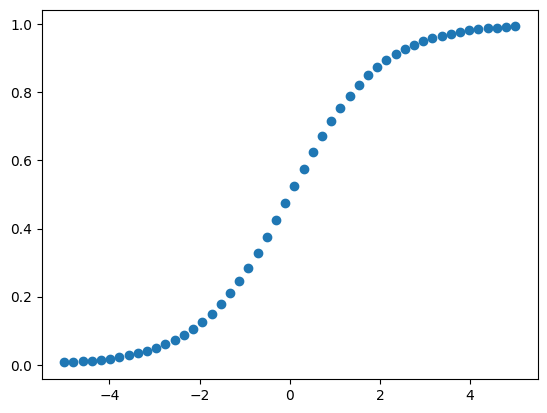

In [5]:
#Define g(x)
def sigmoid(x):
    return (1 + np.exp(-x)) ** -1

#Simulate x form -5 to 5
x = np.linspace(-5,5, 50) #np.arange(-5,5,0.1)
y= sigmoid(x)

#Try plot it
plt.scatter(x,y)

In [12]:
# Define X with two samples
# x = [[5,10], [3,4]]

X = np.array([[5,10], [3,4], [9,1]])
X.shape

#Define any theta
theta = np.ones((2,))

#perform X dot theta
yhat = X.dot(theta)
print(yhat)

#Perform sigmoid and check if value btn. 0 and 1
yhat_sig = sigmoid(yhat)

#Perform round nearest
print(np.round(yhat_sig))

[15.  7. 10.]
[1. 1. 1.]


Good 19.84779709959251
Bad 0.31844724673955827


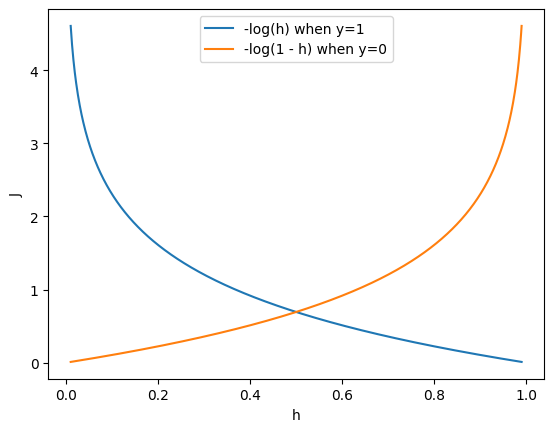

In [20]:
#1. Please code this loss function above.
#h = f(x) = yhat
def binary_cross_entropy(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y)*np.log(1 - yhat))

#1.1 Please plot -np.log(h) and -np.log(1 - h), 
# where h is a value between 0.01 to 0.99
h = np.linspace(0.01, 0.99, 1000)
plt.plot(h, -np.log(h),     label="-log(h) when y=1")
plt.plot(h, -np.log(1 - h), label="-log(1 - h) when y=0")
plt.xlabel('h')
plt.ylabel('J')
plt.legend()

#2.1 simulate the actual y
y = np.array([0, 1, 1, 0, 1])

#2.2 simulate a very bad yhat - no good predictions
bad_yhat = np.array([0.88, 0.01, 0.02, 0.99, 0.01])

#2.3 simulate a very good yhat - very good predictions
good_yhat = np.array([0.01, 0.98, 0.92, 0.03, 0.84])

#3. try to get J(\theta) of actual y vs. (1)very bad, (2)very good
print("Good", binary_cross_entropy(y, bad_yhat))
print("Bad", binary_cross_entropy(y, good_yhat))



In [75]:
#1. Load breast cancer from sklearn
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()


(569, 30) (569,)


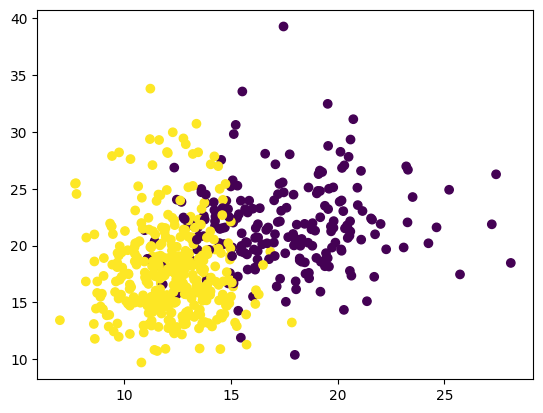

In [76]:
#2. Set X and y, split properly, standadize properly
X = breast_cancer.data
y = breast_cancer.target
print(X.shape, y.shape)


#2.1 Plot
plt.scatter(X[:,0], X[:,1], c=y)
                                                    

In [77]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=999)

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Satndadize the trainning set
X_train = sc.fit_transform(X_train)

# Standardize the test set
X_test = sc.transform(X_test)

# Add intercept
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis = 1)

intercept_test = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept_test, X_test), axis = 1)

In [79]:
#3. Create a class of LogisticRegression

class LogisticRegression_v0(object):
    def __init__(self, alpha=0.001, num_epochs=5):
        self.num_epochs = num_epochs
        self.alpha = alpha

    def binary_cross_entropy(self, y, yhat):
        return -np.sum(y * np.log(yhat) + (1 - y)*np.log(1 - yhat))

    def sigmoid(self, h):
        return (1 + np.exp(-h)) ** -1

    def fit(self, X_train, y_train): 
        #Create theta
        self.theta = np.ones(X_train.shape[1]) 
        for epoch in range(self.num_epochs):
            
            #randomize X_train
            perm = np.random.permutation(X_train.shape[0])                        
            X_train = X_train[perm]
            y_train = y_train[perm]

            #predict
            yhat = self._predict(X_train)

            #grad
            grad = X_train.T @ (yhat - y_train)        

            #update
            self.theta = self.theta - self.alpha * grad

    def _predict(self, X):  #fx, h_theta,
        return self.sigmoid(X @ self.theta)
    
    def predict(self, X):  #return either 0 or 1
        return np.round(self.sigmoid(X @ self.theta))

In [80]:
class LogisticRegression(object):
    
    def __init__(self, num_epochs=5, alpha=0.01):
        self.num_epochs = num_epochs
        self.alpha      = alpha
    
    def binary_cross_entropy(self, y, yhat):
        return -np.sum(y * np.log(yhat) + (1 - y)*np.log(1 - yhat))
    
    def sigmoid(self, h):  #logit function, or sigmoid function
        return (1 + np.exp(-h)) ** -1

    def fit(self, X_train, y_train): 
        #create theta
        self.theta = np.ones((X_train.shape[1], ))
        #loop epochs
        for _ in range(self.num_epochs):
        
            #randomize our X_train
            perm = np.random.permutation(X_train.shape[0])
            X_train = X_train[perm]
            y_train = y_train[perm]
            
            #predict
            yhat = self._predict(X_train)
            
            #grad
            grad = X_train.T @ (yhat - y_train)
            
            #update
            self.theta = self.theta - self.alpha * grad
    
    def _predict(self, X):  #fx, h_theta,
        return self.sigmoid(X @ self.theta)
    
    def predict(self, X):  #return either 0 or 1
        return np.round(self.sigmoid(X @ self.theta))



In [81]:
from sklearn.metrics import classification_report, accuracy_score
#4. fit and predict
lr = LogisticRegression()

#5. Later ... recall, precesion, accuracy
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

accuracy_score(y_test, yhat)



0.9532163742690059

In [82]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.95      0.97      0.96        98

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [83]:
'''
Confusion matrix
                    Actual 
                    1           0

        1       #True pos       #False pos

Predict

        0       #False neg      #True neg
'''

# TP + FP + FN + TN = m

#Accuracy  = 

'\nConfusion matrix\n                    Actual \n                    1           0\n\n        1       #True pos       #False pos\n\nPredict\n\n        0       #False neg      #True neg\n'

In [90]:
#Code the following from scratch
def cm(yhat, y):

    TP, FN, FP, TN = 0, 0, 0, 0
    for i in range(yhat.shape[0]):
        if y[i] == 1 and yhat[i] == 1:
            TP += 1
        elif y[i] == 1 and yhat[i] == 0:
            FN += 1
        elif y[i] == 0 and yhat[i] == 1:
            FP += 1
        elif y[i] == 0 and yhat[i] == 0:
            TN += 1
    # accuracy = TP / yhat.shape[0]
    # recall = TP / (TP + FN)
    # precision = TP / (TP + FP)
    assert (TP+ FN+ FP+ TN) == yhat.shape[0]
    return TP, TN, FP, FN


In [92]:
TP, TN, FP, FN = cm(yhat, y_test)

accuracy = TP + TN / (TP+ FN+ FP+ TN)

recall = TP / (TP + FN)

precision = TP / (TP + FP)

print (accuracy, recall, precision)



95.39766081871345 0.9693877551020408 0.95


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, yhat), recall_score(y_test, yhat), precision_score(y_test, yhat))

0.9532163742690059 0.9693877551020408 0.95


In [96]:
f1 = 2 * (recall  * precision) / (recall  + precision)
f1

0.9595959595959594